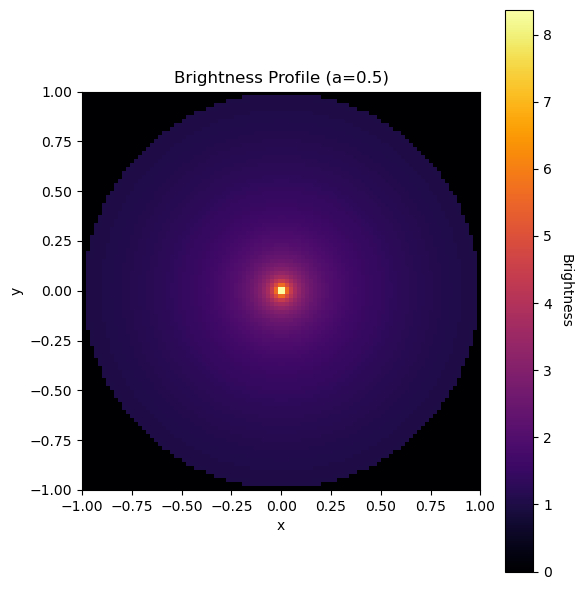

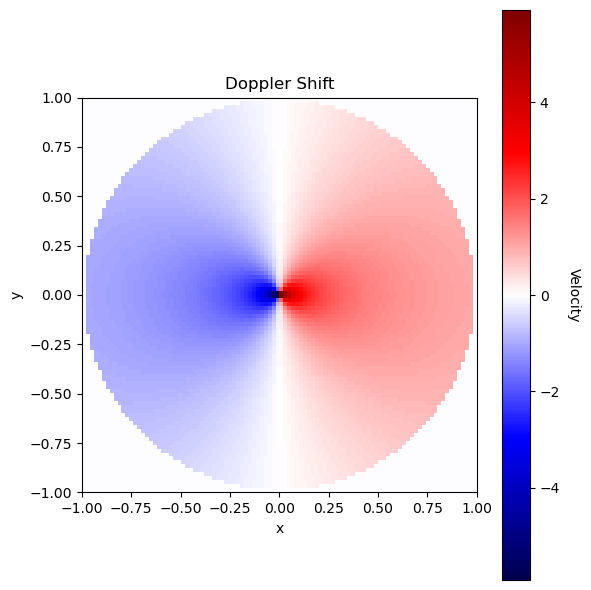

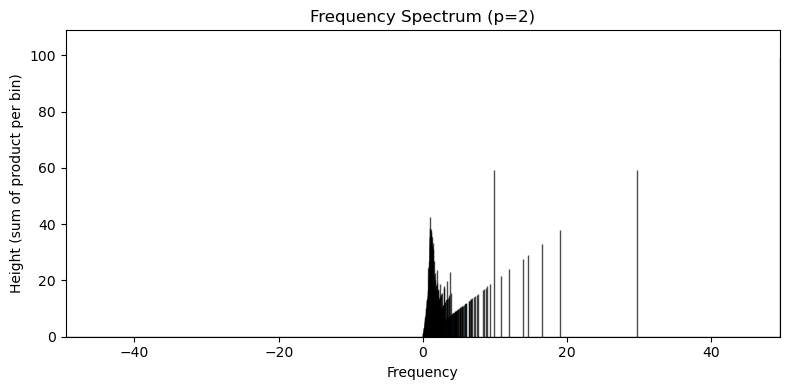

In [ ]:
#Accretion disk model: Week 2

import numpy as np
import matplotlib.pyplot as plt

# ********** Part 1: Brightness profile of accretion disk **********

# --- Initialize disk ---

# Parameters
N = 100 # resolution
Rmax = 1 #disc radius

# 1D coordinate array
coords = np.linspace(-Rmax, Rmax, N)

# Initialize 2D coordinate matrices
X, Y = np.meshgrid(coords, coords, indexing="xy")
R = np.hypot(X, Y)  # matrix of radial distances from the center
theta = np.arctan2(Y, X) # matrix of angles from x axis

# Unit circle mask (True inside, False outside)
mask = R <= Rmax
#print(mask)

# --- Assign brightness values ---

# New parameters
a = 0.5    # power-law index
eps = 1e-12  # to avoid division by zero at r=0

# Assign brightness values: r^-a inside circle, 0 outside
brightness = np.zeros_like(R) # Initialize with zeros
brightness[mask] = np.maximum(R[mask], eps) ** (-a) #Assign values only where mask is True
#print(np.round(brightness, 1))

# --- Plot Brightness Profile ---

fig, ax = plt.subplots(figsize=(6, 6))

img = ax.imshow(
    brightness,
    extent=[-Rmax, Rmax, -Rmax, Rmax],
    origin="lower",
    cmap="inferno",
    aspect="equal"  # Keep the disc circular
)

# Add colorbar
cbar = fig.colorbar(img, ax=ax)
cbar.set_label("Brightness", rotation=270, labelpad=15)

# Titles and labels
ax.set_title(f"Brightness Profile (a={a})")
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.tight_layout()
plt.show()

# ********** Part 2: Accression Disk Light Emission Profile **********

# --- Initalize Disk ---
u = np.zeros_like(R) # Initialize with zeros

# --- Assign U values ---
u[mask] = np.cos(theta[mask]) / (np.maximum(R[mask], eps) ** 0.5) # Assign values only where mask is True

# --- Plot U Profile ---

fig, ax = plt.subplots(figsize=(6, 6))

img = ax.imshow(
    u,
    extent=[-Rmax, Rmax, -Rmax, Rmax],
    origin="lower",
    cmap="seismic",
    aspect="equal"  # Keep the disc circular
)

# Add colorbar
cbar = fig.colorbar(img, ax=ax)
cbar.set_label("Velocity", rotation=270, labelpad=15)

# Titles and labels
ax.set_title("Doppler Shift")
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.tight_layout()
plt.show()

# ********** Part 3: Frequency Spectrum **********

#Parameters
p = 2 # frequency resolution (decimal places)
step = 10**(-p)

#Multiply brightness and velocity of each point in space
product[mask] = u * brightness

#discretise the product matrix entries in accordance with desired resolution
product_round = np.round(product, p)

# Turn points inside disc into vector
product_flat = product_round[mask].flatten()

#sort the vector
product_flat.sort()






# Parameters
p = 2  # resolution (decimal places)
step = 10**(-p)

# Combine field
product = u * brightness

# (Optional) round if you want discrete levels at multiples of 'step'
product_round = np.round(product, p)

# Use only valid pixels (inside disc & finite)
valid = mask & np.isfinite(product_round) & np.isfinite(product)

# Bin edges centered on the rounded grid:
x_min = product_round[valid].min()
x_max = product_round[valid].max()

# Build edges so that bin centers are at multiples of 'step'
# centers: c_k = c0 + k*step; edges = centers ± step/2
centers = np.arange(x_min, x_max + step, step)
edges = np.concatenate(([centers[0] - 0.5*step],
                        centers + 0.5*step))

# Sum 'product' into bins of 'product_round'
x_heights, edges = np.histogram(product_round[valid],
                                bins=edges,
                                weights=product[valid])

# Bin centers for plotting
x_centers = 0.5 * (edges[:-1] + edges[1:])

# --- Plot Frequency Spectrum ---
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(x_centers, x_heights, width=step, align='center',
       edgecolor='black', alpha=0.7)
ax.set_xlabel("Frequency")
ax.set_ylabel("Height (sum of product per bin)")
ax.set_title(f"Frequency Spectrum (p={p})")
ax.set_xlim(x_centers.min() - step, x_centers.max() + step)
ax.set_ylim(0, np.max(x_heights) * 1.1)
plt.tight_layout()
plt.show()
